In [14]:
import numpy as np
import matplotlib.pyplot as plt

class MobiusStrip:
    def __init__(self, R=1.0, w=0.5, n=300):
        self.R = R
        self.w = w
        self.n = n

        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)

    def for_surface(self):
        U, V = self.U, self.V
        R = self.R

        X = (R + V * np.cos(U / 2)) * np.cos(U)
        Y = (R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def visualization(self):
        X, Y, Z = self.for_surface()
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', linewidth=0.1)
        ax.set_title("Mobius Strip")
        plt.show()

    def surface_area(self):
        X, Y, Z = self.for_surface()
        area = 0
        for i in range(self.n - 1):
            for j in range(self.n - 1):
                p1 = np.array([X[j, i], Y[j, i], Z[j, i]])
                p2 = np.array([X[j + 1, i], Y[j + 1, i], Z[j + 1, i]])
                p3 = np.array([X[j + 1, i + 1], Y[j + 1, i + 1], Z[j + 1, i + 1]])
                p4 = np.array([X[j, i + 1], Y[j, i + 1], Z[j, i + 1]])

                t1 = 0.5 * np.linalg.norm(np.cross(p2 - p1, p3 - p1))
                t2 = 0.5 * np.linalg.norm(np.cross(p3 - p1, p4 - p1))
                area += t1 + t2
        return area

    def edge_length(self):
        X, Y, Z = self.for_surface()
        edge = np.array([X[0, :], Y[0, :], Z[0, :]]).T
        length = np.sum(np.linalg.norm(np.diff(edge, axis=0), axis=1))
        length += np.linalg.norm(edge[-1] - edge[0])
        return length


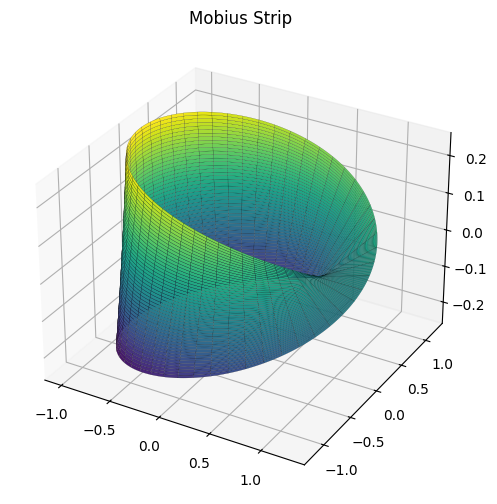

Area:  3.149766089468888
Edge Length:  6.833534602559543


In [13]:
mobius = MobiusStrip()
mobius.visualization()
print("Area: ", mobius.surface_area())
print("Edge Length: ", mobius.edge_length())
